<a href="https://colab.research.google.com/github/DataScienceUB/DeepLearningMaster20192020/blob/master/5.%20Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `keras`

> Keras is a high-level neural networks library, written in Python and capable of running on top of either TensorFlow or CNTK. It was developed with a focus on enabling fast experimentation.



In [1]:
import tensorflow as tf

print(tf.VERSION)
print(tf.keras.__version__)

1.15.0
2.2.4-tf


## Definition of your model and optimization process

The core data structure of Keras is a model, a way to organize layers. The main type of model is the ``Sequential model``, a linear stack of layers. 

In [0]:
from tensorflow.keras import layers

Stacking layers is as easy as ``.add()``:


In [0]:
model = tf.keras.Sequential()

# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(64, activation='relu', input_shape=(32,)))

# Add another:
model.add(layers.Dense(64, activation='relu'))

# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


Once your model looks good, configure its learning process with ``.compile()``:

In [3]:
# Alternative syntax for adding layers

model = tf.keras.Sequential([
    
# Adds a densely-connected layer with 64 units to the model:
layers.Dense(32, activation='relu', input_shape=(32,)),
# Add another:
layers.Dense(32, activation='relu'),
# Add a softmax layer with 10 output units:
layers.Dense(10, activation='softmax')

])

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 2,442
Trainable params: 2,442
Non-trainable params: 0
_________________________________________________________________


`tf.keras.Model.compile` takes three important arguments:

* `optimizer`: This object specifies the training procedure. Pass it optimizer
  instances from the `tf.train` module, such as
  `tf.train.AdamOptimizer`, `tf.train.RMSPropOptimizer`, or
  `tf.train.GradientDescentOptimizer`.
* `loss`: The function to minimize during optimization. Common choices include
  mean square error (`mse`), `categorical_crossentropy`, and
  `binary_crossentropy`. Loss functions are specified by name or by
  passing a callable object from the `tf.keras.losses` module.
* `metrics`: Used to monitor training. These are string names or callables from
  the `tf.keras.metrics` module.

Other examples:

```python
# Configure a model for mean-squared error regression.
model.compile(optimizer=tf.train.AdamOptimizer(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error

# Configure a model for categorical classification.
model.compile(optimizer=tf.train.RMSPropOptimizer(0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.categorical_accuracy])
```

If you need to, you can further configure your optimizer.

```Python
from tensorflow.keras.optimizers import SGD
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
```

## Data Input and model fitting.

For small datasets, use in-memory [NumPy](https://www.numpy.org/)
arrays to train and evaluate a model. 

The model is "fit" to the training data
using the `fit` method:

In [5]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

model.fit(data, labels, epochs=10, batch_size=32)

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 56us/sample - loss: 504.1462 - acc: 0.0960
Epoch 2/10
1000/1000 [==============================] - 0s 52us/sample - loss: 580.0402 - acc: 0.0840
Epoch 3/10
1000/1000 [==============================] - 0s 48us/sample - loss: 662.9537 - acc: 0.0920
Epoch 4/10
1000/1000 [==============================] - 0s 54us/sample - loss: 756.3753 - acc: 0.0780
Epoch 5/10
1000/1000 [==============================] - 0s 64us/sample - loss: 831.8145 - acc: 0.1050
Epoch 6/10
1000/1000 [==============================] - 0s 52us/sample - loss: 892.1810 - acc: 0.0930
Epoch 7/10
1000/1000 [==============================] - 0s 50us/sample - loss: 934.1316 - acc: 0.0980
Epoch 8/10
1000/1000 [==============================] - 0s 48us/sample - loss: 977.9633 - acc: 0.0830
Epoch 9/10
1000/1000 [==============================] - 0s 48us/sample - loss: 1034.1962 - acc: 0.0830
Epoch 10/10
1000/1000 [==============================] - 0s

`tensorflow.keras.Model.fit` takes three important arguments:

* `epochs`: Training is structured into *epochs*. 
* `batch_size`: This integer
  specifies the size of each batch. Be aware that the last batch may be smaller
  if the total number of samples is not divisible by the batch size.
* `validation_data`: Passing this argument—a tuple of inputs
  and labels—allows the model to display the loss and metrics in inference mode
  for the passed data, at the end of each epoch.

Here's an example using `validation_data`:

In [0]:
import numpy as np

data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 10))

model.fit(data, labels, epochs=10, batch_size=32,
          validation_data=(val_data, val_labels))

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 0s 119us/sample - loss: 11.5181 - acc: 0.1020 - val_loss: 11.8104 - val_acc: 0.1300
Epoch 2/10
1000/1000 [==============================] - 0s 52us/sample - loss: 11.5126 - acc: 0.1170 - val_loss: 11.8084 - val_acc: 0.1000
Epoch 3/10
1000/1000 [==============================] - 0s 70us/sample - loss: 11.5101 - acc: 0.1320 - val_loss: 11.8098 - val_acc: 0.0800
Epoch 4/10
1000/1000 [==============================] - 0s 57us/sample - loss: 11.5078 - acc: 0.1370 - val_loss: 11.8074 - val_acc: 0.1000
Epoch 5/10
1000/1000 [==============================] - 0s 53us/sample - loss: 11.5060 - acc: 0.1400 - val_loss: 11.8070 - val_acc: 0.0800
Epoch 6/10
1000/1000 [==============================] - 0s 59us/sample - loss: 11.5044 - acc: 0.1530 - val_loss: 11.8057 - val_acc: 0.1000
Epoch 7/10
1000/1000 [==============================] - 0s 54us/sample - loss: 11.5026 - acc: 0.1520 - val_loss: 11.80

If you have to process large datasets you must use `tf` Datasets API. `feed-dict` is the slowest possible way to pass information to TensorFlow.

A `Dataset` can be used to represent an input pipeline as a collection of elements (nested structures of tensors) and a "logical plan" of transformations that act on those elements.

In order to use a Dataset we need three steps:

+ Importing Data. Create a `Dataset` instance from some data.
+ Create an Iterator. By using the created dataset to make an `Iterator` instance to iterate through the dataset.
+ Consuming Data. By using the created iterator we can get the elements from the dataset to feed the model.


In [8]:
# Instantiates a toy dataset instance:
dataset = tf.data.Dataset.from_tensor_slices((data, labels))

# With the Dataset API we can use the method batch(BATCH_SIZE) that 
# automatically batches the dataset with the provided size. 
# The default value is one.
dataset = dataset.batch(10)


# Using .repeat() we can specify the number of times we want the dataset to be 
# iterated. If no parameter is passed it will loop forever, usually is good to 
# just loop forever and directly control the number of epochs with a standard 
# loop.
dataset = dataset.repeat()

# We are using an iterator (Dataset). In this case we have to specify `steps_per_epoch` 
# when calling `fit` on a dataset. `steps_per_epoch` = Total number of steps 
# (batches of samples) to yield from generator before declaring one epoch 
# finished and starting the next epoch. 
# It should typically be equal to the number of unique samples of your 
# dataset divided by the batch size.
model.fit(dataset, epochs=4, steps_per_epoch=100)

Train on 100 steps
Epoch 1/4
100/100 [==============================] - 0s 2ms/step - loss: 121.9096 - acc: 0.1070
Epoch 2/4
100/100 [==============================] - 0s 2ms/step - loss: 162.4547 - acc: 0.0980
Epoch 3/4
100/100 [==============================] - 0s 2ms/step - loss: 200.6783 - acc: 0.1050
Epoch 4/4
100/100 [==============================] - 0s 2ms/step - loss: 217.2260 - acc: 0.1050


We can, of course, initialise our dataset with some tensor:

```python
# using a tensor
dataset = tf.data.Dataset.from_tensor_slices(tf.random_uniform([100, 2]))
```

There are some other options: from a `Placeholder`, from a generator, from a `csv` file, etc.



### Evaluate and predict

The `tf.keras.Model.evaluate` and `tf.keras.Model.predict` methods can use NumPy
data and a `tf.data.Dataset`.

To *evaluate* the inference-mode loss and metrics for the data provided:

In [9]:
data = np.random.random((1000, 32))
labels = np.random.random((1000, 10))

dataset = tf.data.Dataset.from_tensor_slices((data, labels))
dataset = dataset.batch(10)
dataset = dataset.repeat()

model.evaluate(data, labels, batch_size=10)

model.evaluate(dataset, steps=100)

100/100 [==============================] - 0s 1ms/step - loss: 172.1239 - acc: 0.0980


[172.12385040283203, 0.098]

And to *predict* the output of the last layer in inference for the data provided,
as a NumPy array:

In [0]:
result = model.predict(data, batch_size=32)
print(result.shape)
print(result[0])

(1000, 10)
[0.09417029 0.09438135 0.09979257 0.09604443 0.08704696 0.12432702
 0.09390688 0.0984251  0.12549871 0.08640669]


## Example: MNIST  MLP

In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

tf.reset_default_graph()

np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test  = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# print model characteristics
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

history = model.fit(X_train, 
                    Y_train,
                    batch_size=batch_size, 
                    epochs=nb_epoch,
                    verbose=1, 
                    validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)

print('\n')
print('Test score:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)         

## The `dropout layer`

Dropout is a a technique used to tackle overfitting . The `Dropout` method in `keras.layers` module takes in a float between 0 and 1, which is the fraction of the neurons to drop. 

<center>
<img src="https://raw.githubusercontent.com/DataScienceUB/DeepLearningMaster2019/master/images/dropout.png" alt="" style="width: 400px;"/> 
  </center>
  <center>
 (Source: http://cs231n.stanford.edu/)
</center>


A dropout layer randomly sets some of the dimensions of your input vector to be zero with some probability $𝑘𝑒𝑒𝑝_{𝑝𝑟𝑜𝑏}$. A dropout layer does not have any trainable parameters i.e. nothing gets updated during backward pass of backpropagation.

To ensure that expected sum of vectors fed to this layer remains the same if no dropout was applied, the remaining dimensions which are not set to zero are scaled by $1/𝑘𝑒𝑒𝑝_{𝑝𝑟𝑜𝑏}$.

Dropout is only applied during training, and you need to rescale the remaining neuron activations. 

## The ``merge`` layer

Multiple Sequential instances can be merged into a single output via a ``Merge`` layer. The output is a layer that can be added as first layer in a new ``Sequential`` model. For instance, here's a model with two separate input branches getting merged:

```python
from keras.layers import Merge

left_branch = Sequential()
left_branch.add(Dense(32, input_dim=784))

right_branch = Sequential()
right_branch.add(Dense(32, input_dim=784))

merged = Merge([left_branch, right_branch], mode='concat')

final_model = Sequential()
final_model.add(merged)
final_model.add(Dense(10, activation='softmax'))
```

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/merge.png?raw=1)

### Merge layers: ``add``, ``subtract``, ...


The Merge layer supports a number of pre-defined modes:

+ `sum` (default): element-wise sum
concat: tensor concatenation. You can specify the concatenation axis via the argument concat_axis.
+ `mul`: element-wise multiplication
+ `ave`: tensor average
+ `dot`: dot product. You can specify which axes to reduce along via the argument dot_axes.
+ `cos`: cosine proximity between vectors in 2D tensors.

## Keras functional API

The Keras ``functional`` API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

The ``Sequential`` model is probably a better choice to implement such a network, but it helps to start with something really simple.

Using ``Model`` class:

+ A layer instance is callable (on a tensor), and it returns a tensor
+ ``Input`` tensor(s) and output tensor(s) can then be used to define a ``Model``
+ Such a model can be trained just like Keras Sequential models.

In [10]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

tf.keras.backend.clear_session()  

from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
data = X_train/255
labels = np_utils.to_categorical(y_train, 10)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [11]:
tf.reset_default_graph()

# this returns a tensor
inputs = Input(shape=(784,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# this creates a model that includes
# the Input layer and three Dense layers
model = Model(input=inputs, output=predictions)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(data, 
          labels,
          batch_size=128, 
          epochs=5)  # starts training






Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]





Epoch 1/5





60000/60000 [==============================] - 2s 30us/step - loss: 0.3612 - acc: 0.8991
Epoch 2/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1728 - acc: 0.9492
Epoch 3/5
60000/60000 [==============================] - 1s 25us/step - loss: 0.1284 - acc: 0.9617
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.1033 - acc: 0.9690
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0874 - acc: 0.9738


All models are callable, just like layers.

With the functional API, it is easy to re-use trained models: you can treat any model as if it were a layer, by calling it on a tensor. Note that by calling a model you aren't just re-using the architecture of the model, you are also re-using its weights.

```python
x = Input(shape=(784,))
# this works, and returns the 10-way softmax we defined above.
y = model(x)
```

##  Siamese MLP on pairs of digits from the MNIST 

(Based on: https://github.com/fchollet/keras/blob/master/examples/mnist_siamese_graph.py)

Siamese networks are commonly used in image comparison applications such as face or signature verification. They can also be used in language processing, times series analysis, etc.

In a typical Siamese network a large part of the network is duplicated at the base to allow multiple inputs to go through identical layers. 

This example shows how to teach a neural network to map an image from the MNIST dataset to a 2D point, while **trying to minimize the distance between points of the same class and maximize the distance between points of different classes**.

Siamese network architecture is a way of learning how to embed samples into lower-dimensions based on similarity computed with features learned by a feature network.

The feature network is the architecture we intend to fine-tune in this setting. 

Let's suppose we want to embed images. Given two images $X_1$ and $X_2$, we feed into the feature network $G_W$ and compute corresponding feature vectors $G_W(X_1)$ and $G_W(X_2)$. The final layer computes pair-wise distance between computed features $E_W = || G_W(X_1) - G_W(X_2) ||_{1}$ and final loss layer $L$ considers whether these two images are from the same class (label $1$) or not (label $0$).

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/siamese1.png?raw=1)

In the original [paper](http://yann.lecun.com/exdb/publis/pdf/chopra-05.pdf) it was proposed the **Contrastive Loss Function**: 

$$ L(W,(Y,X_1,X_2)^i) = (1 - Y) \times L_S(E_W(X_1,X_2)^i) + Y \times L_D(E_W(X_1,X_2)^i) $$

where $L_S$ is the partial loss function for a "same-class" pair and $L_D$ is the partial loss function for a "different-class" pair.

$L_S$ and $L_D$ should be designed in such a way that the minimization of $L$ will decrease the distance in the embedding space of "same-class" pairs and increase it in the case of "different-class" pairs:

$$ L_S = \frac{1}{2} E_W^2 $$
$$ L_D = \frac{1}{2} \{ \mbox{max }(0,1-E_W) \}^2 $$

In [2]:

from __future__ import absolute_import
from __future__ import print_function
import numpy as np

import random
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Lambda
from keras.optimizers import RMSprop
from keras import backend as K

num_classes = 10
epochs = 20


def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)


def create_pairs(x, digit_indices):
    '''Positive and negative pair creation.
    Alternates between positive and negative pairs.
    '''
    pairs = []
    labels = []
    n = min([len(digit_indices[d]) for d in range(num_classes)]) - 1
    for d in range(num_classes):
        for i in range(n):
            z1, z2 = digit_indices[d][i], digit_indices[d][i + 1]
            pairs += [[x[z1], x[z2]]]
            inc = random.randrange(1, num_classes)
            dn = (d + inc) % num_classes
            z1, z2 = digit_indices[d][i], digit_indices[dn][i]
            pairs += [[x[z1], x[z2]]]
            labels += [1, 0]
    return np.array(pairs), np.array(labels)


def create_base_network(input_shape):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)


def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))


# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
input_shape = x_train.shape[1:]

# create training+test positive and negative pairs
digit_indices = [np.where(y_train == i)[0] for i in range(num_classes)]
tr_pairs, tr_y = create_pairs(x_train, digit_indices)

digit_indices = [np.where(y_test == i)[0] for i in range(num_classes)]
te_pairs, te_y = create_pairs(x_test, digit_indices)

# network definition
base_network = create_base_network(input_shape)

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model([input_a, input_b], distance)

# train
rms = RMSprop()
model.compile(loss=contrastive_loss, optimizer=rms, metrics=[accuracy])
model.fit([tr_pairs[:, 0], tr_pairs[:, 1]], tr_y,
          batch_size=128,
          epochs=epochs,
          validation_data=([te_pairs[:, 0], te_pairs[:, 1]], te_y))

# compute final accuracy on training and test sets
y_pred = model.predict([tr_pairs[:, 0], tr_pairs[:, 1]])
tr_acc = compute_accuracy(tr_y, y_pred)
y_pred = model.predict([te_pairs[:, 0], te_pairs[:, 1]])
te_acc = compute_accuracy(te_y, y_pred)

print('* Accuracy on training set: %0.2f%%' % (100 * tr_acc))
print('* Accuracy on test set: %0.2f%%' % (100 * te_acc))

Train on 108400 samples, validate on 17820 samples
Epoch 1/20
108400/108400 [==============================] - 8s 77us/step - loss: 0.0973 - accuracy: 0.8844 - val_loss: 0.0470 - val_accuracy: 0.9523
Epoch 2/20
108400/108400 [==============================] - 8s 74us/step - loss: 0.0452 - accuracy: 0.9559 - val_loss: 0.0346 - val_accuracy: 0.9663
Epoch 3/20
108400/108400 [==============================] - 8s 75us/step - loss: 0.0323 - accuracy: 0.9704 - val_loss: 0.0298 - val_accuracy: 0.9713
Epoch 4/20
108400/108400 [==============================] - 8s 78us/step - loss: 0.0263 - accuracy: 0.9757 - val_loss: 0.0272 - val_accuracy: 0.9729
Epoch 5/20
108400/108400 [==============================] - 9s 79us/step - loss: 0.0223 - accuracy: 0.9793 - val_loss: 0.0277 - val_accuracy: 0.9727
Epoch 6/20
108400/108400 [==============================] - 8s 75us/step - loss: 0.0202 - accuracy: 0.9813 - val_loss: 0.0285 - val_accuracy: 0.9705
Epoch 7/20
108400/108400 [=============================

In [11]:
x_train[:2000,:,:].shape

(2000, 28, 28)

In [13]:
import pandas as pd
import umap



embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.2,
                      metric='correlation').fit_transform(x_train[:2000,:,:])

ValueError: ignored

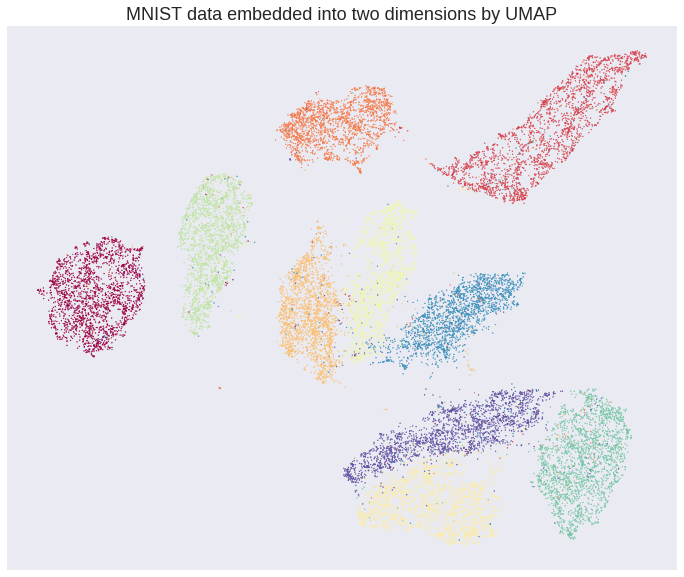

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(embedding[:,0], embedding[:,1], 
            c=y_train[:20000],
            cmap="Spectral", 
            s=1.0)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()

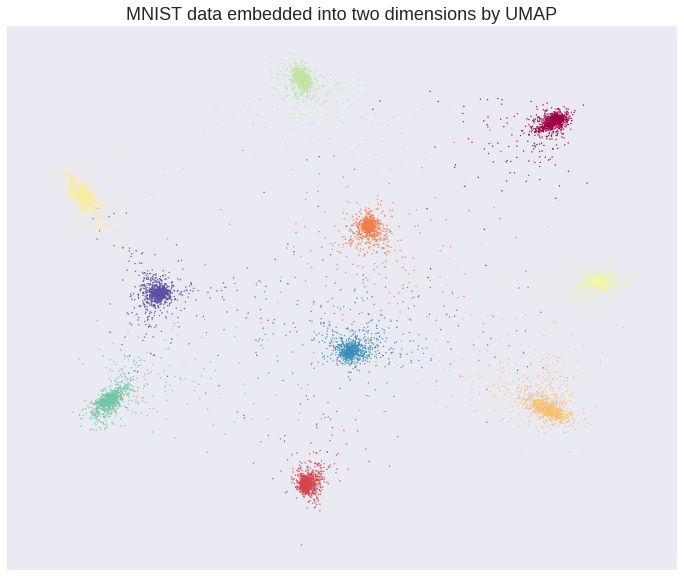

In [0]:
result = base_network.predict(X_test, batch_size=32)

fig, ax = plt.subplots(figsize=(12, 10))
plt.scatter(result[:,0], result[:,1],
            c=y_test[:20000],
            cmap="Spectral", 
            s=1.0)
plt.setp(ax, xticks=[], yticks=[])
plt.title("MNIST data embedded into two dimensions by UMAP", fontsize=18)

plt.show()

## Multi-input and multi-output models and the `Embedding` layer

Here's a good use case for the functional API: models with multiple inputs and outputs. The functional API makes it easy to manipulate a large number of intertwined datastreams.

Let's consider the following model. We seek to predict how many retweets and likes a news headline will receive on Twitter. The main input to the model will be the headline itself, as a sequence of words, but to spice things up, our model will also have an auxiliary input, receiving extra data such as the time of day when the headline was posted, etc. 

The model will also be supervised via two loss functions. Using the main loss function earlier in a model is a good regularization mechanism for deep models.

We will also use an `embedding` layer. This layer turns positive integers (indexes) into dense vectors of fixed size. eg. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`. The parameters of this layer are the vectors.

Here's what our model looks like:

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/multi.png?raw=1)

Let's implement it with the functional API.

The main input will receive the headline, as a sequence of integers (each integer encodes a word). The integers will be between 1 and 10,000 (a vocabulary of 10,000 words) and the sequences will be 100 words long.

In [0]:
from keras.layers import Input, Embedding, LSTM, Dense, concatenate
from keras.models import Model

# headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# this embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# a LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

Here we insert the auxiliary loss, allowing the LSTM and Embedding layer to be trained smoothly even though the main loss will be much higher in the model.

In [0]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

At this point, we feed into the model our auxiliary input data by concatenating it with the LSTM output:

In [0]:
auxiliary_input = Input(shape=(5,), name='aux_input')
x = concatenate([lstm_out, auxiliary_input])

# we stack a deep fully-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# and finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

This defines a model with two inputs and two outputs:

In [0]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

We compile the model and assign a weight of 0.2 to the auxiliary loss. To specify different loss_weights or loss for each different output, you can use a list or a dictionary. Here we pass a single loss as the loss argument, so the same loss will be used on all outputs.

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

We can train the model by passing it lists of input arrays and target arrays:

```python
model.fit([headline_data, additional_data], [labels, labels],
          nb_epoch=50, batch_size=32)
```
Since our inputs and outputs are named (we passed them a "name" argument), We could also have compiled the model via:

```python
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

# and trained it via:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          nb_epoch=50, batch_size=32)
```

## Shared layers

Another good use for the functional API are models that use shared layers. Let's take a look at shared layers.

Let's consider a dataset of tweets. We want to build a model that can tell whether two tweets are from the same person or not (this can allow us to compare users by the similarity of their tweets, for instance).

One way to achieve this is to build a model that encodes two tweets into two vectors, concatenates the vectors and adds a logistic regression of top, outputting a probability that the two tweets share the same author. The model would then be trained on positive tweet pairs and negative tweet pairs.

Because the problem is symmetric, the mechanism that encodes the first tweet should be reused (weights and all) to encode the second tweet. Here we use a shared LSTM layer to encode the tweets.

Let's build this with the functional API. We will take as input for a tweet a binary matrix of shape (140, 256), i.e. a sequence of 140 vectors of size 256, where each dimension in the 256-dimensional vector encodes the presence/absence of a character (out of an alphabet of 256 frequent characters).

In [0]:
from keras.layers import Input, LSTM, Dense, concatenate
from keras.models import Model

tweet_a = Input(shape=(140, 256))
tweet_b = Input(shape=(140, 256))

To share a layer across different inputs, simply instantiate the layer once, then call it on as many inputs as you want:

In [0]:
# this layer can take as input a matrix
# and will return a vector of size 64
shared_lstm = LSTM(64)

# when we reuse the same layer instance
# multiple times, the weights of the layer
# are also being reused
# (it is effectively *the same* layer)
encoded_a = shared_lstm(tweet_a)
encoded_b = shared_lstm(tweet_b)

# we can then concatenate the two vectors:
merged_vector = concatenate([encoded_a, encoded_b],axis=-1)

# and add a logistic regression on top
predictions = Dense(1, activation='sigmoid')(merged_vector)

# we define a trainable model linking the
# tweet inputs to the predictions
model = Model(inputs=[tweet_a, tweet_b], outputs=predictions)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
